#1 Adaboost拟合随机数曲线

/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


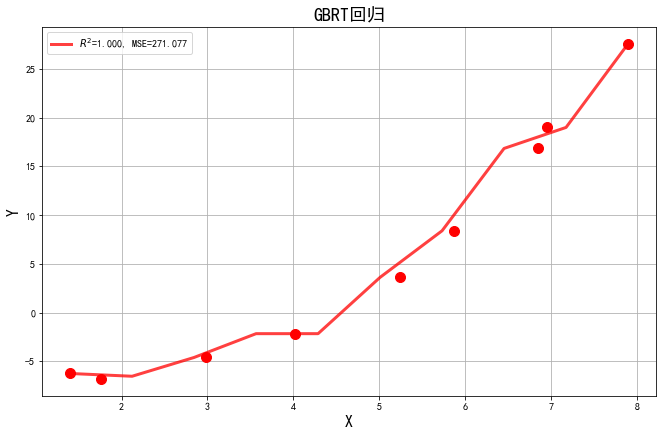

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 1
model = AdaBoostRegressor(n_estimators=100)
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = 'Adaboost回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    #model.set_params(max_depth=d)
    model.fit(x, y)

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    mse = np.average((y_hat - np.array(y)) ** 2)
    label1 = u'$R^2$=%.3f, MSE=%.3f' % (s, mse)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()